<a href="https://colab.research.google.com/github/Alexypl/data-science/blob/master/Stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.18.2
Pandas: 0.25.3


Import data

In [2]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()    

ERROR! Session/line number was not unique in database. History logging moved to new session 59
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2576 entries, 2020-03-27 to 2010-01-04
Data columns (total 5 columns):
Open      2576 non-null float64
High      2576 non-null float64
Low       2576 non-null float64
Close     2576 non-null float64
Volume    2575 non-null float64
dtypes: float64(5)
memory usage: 120.8 KB


In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-27,1930.860,1939.79,1899.9200,1900.10,5387897.0
2020-03-26,1902.000,1956.49,1889.2900,1955.49,6235118.0
2020-03-25,1920.690,1950.26,1885.7800,1885.84,6479073.0
2020-03-24,1951.495,1955.00,1900.3403,1940.10,7147080.0
2020-03-23,1827.750,1919.40,1812.0000,1902.83,7808489.0
...,...,...,...,...,...
2010-01-08,130.700,133.68,129.0300,133.52,9826568.0
2010-01-07,131.960,132.32,128.8000,130.00,11014197.0
2010-01-06,134.630,134.73,131.6500,132.25,7178209.0


In [4]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-27,1930.860,1939.79,1899.9200,1900.10,5387897.0
2020-03-26,1902.000,1956.49,1889.2900,1955.49,6235118.0
2020-03-25,1920.690,1950.26,1885.7800,1885.84,6479073.0
2020-03-24,1951.495,1955.00,1900.3403,1940.10,7147080.0
2020-03-23,1827.750,1919.40,1812.0000,1902.83,7808489.0


In [5]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-27,1930.860,1939.7900,1899.9200,1900.10,5387897.0
2020-03-26,1902.000,1956.4900,1889.2900,1955.49,6235118.0
2020-03-25,1920.690,1950.2600,1885.7800,1885.84,6479073.0
2020-03-24,1951.495,1955.0000,1900.3403,1940.10,7147080.0
2020-03-23,1827.750,1919.4000,1812.0000,1902.83,7808489.0
2020-03-20,1926.310,1957.0000,1820.7300,1846.09,9817850.0
2020-03-19,1860.000,1945.0000,1832.6500,1880.93,10399943.0
2020-03-18,1750.000,1841.6600,1745.0000,1830.00,9645218.0
2020-03-17,1775.470,1857.7750,1689.2402,1807.84,10917129.0


In [6]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,130.70,133.68,129.03,133.52,9826568.0
2010-01-07,131.96,132.32,128.80,130.00,11014197.0
2010-01-06,134.63,134.73,131.65,132.25,7178209.0
2010-01-05,133.25,135.48,131.81,134.69,8851066.0
2010-01-04,136.28,136.61,133.14,133.90,7595995.0


In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [9]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2020-03-27,1930.860,1939.79,1899.9200,1900.10,5387897.0
2020-03-26,1902.000,1956.49,1889.2900,1955.49,6235118.0
2020-03-25,1920.690,1950.26,1885.7800,1885.84,6479073.0
2020-03-24,1951.495,1955.00,1900.3403,1940.10,7147080.0
2020-03-23,1827.750,1919.40,1812.0000,1902.83,7808489.0


In [10]:
df.describe()

,open,high,low,close,volume
count,2576.000000,2576.000000,2576.000000,2576.000000,2.575000e+03
mean,705.641877,712.583050,697.761387,705.529121,4.494003e+06
std,604.834631,610.419779,598.188679,604.509759,2.858600e+06
min,105.930000,111.290000,105.800000,108.610000,8.813370e+05
25%,231.017500,234.692500,228.010000,231.785000,2.738645e+06
50%,384.190000,387.875000,381.620000,384.730000,3.752634e+06
75%,996.550000,999.562500,986.776250,994.017500,5.309928e+06
max,2173.070000,2185.950000,2161.120000,2170.220000,4.239664e+07


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,2576.0,7.056419e+02,6.048346e+02,105.93,2.310175e+02,384.190,9.965500e+02,2173.07
high,2576.0,7.125830e+02,6.104198e+02,111.29,2.346925e+02,387.875,9.995625e+02,2185.95
low,2576.0,6.977614e+02,5.981887e+02,105.80,2.280100e+02,381.620,9.867763e+02,2161.12
close,2576.0,7.055291e+02,6.045098e+02,108.61,2.317850e+02,384.730,9.940175e+02,2170.22
volume,2575.0,4.494003e+06,2.858600e+06,881337.00,2.738645e+06,3752634.000,5.309928e+06,42396643.00


Columns' selection

In [12]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2020-03-27,1930.860,1939.7900,1899.9200,1900.10,5387897.0
2020-03-26,1902.000,1956.4900,1889.2900,1955.49,6235118.0
2020-03-25,1920.690,1950.2600,1885.7800,1885.84,6479073.0
2020-03-24,1951.495,1955.0000,1900.3403,1940.10,7147080.0
2020-03-23,1827.750,1919.4000,1812.0000,1902.83,7808489.0
2020-03-20,1926.310,1957.0000,1820.7300,1846.09,9817850.0
2020-03-19,1860.000,1945.0000,1832.6500,1880.93,10399943.0
2020-03-18,1750.000,1841.6600,1745.0000,1830.00,9645218.0
2020-03-17,1775.470,1857.7750,1689.2402,1807.84,10917129.0


In [13]:
df['open']

Date
2020-03-27    1930.860
2020-03-26    1902.000
2020-03-25    1920.690
2020-03-24    1951.495
2020-03-23    1827.750
2020-03-20    1926.310
2020-03-19    1860.000
2020-03-18    1750.000
2020-03-17    1775.470
2020-03-16    1641.510
Name: open, dtype: float64

In [15]:
df.open

Date
2020-03-27    1930.860
2020-03-26    1902.000
2020-03-25    1920.690
2020-03-24    1951.495
2020-03-23    1827.750
2020-03-20    1926.310
2020-03-19    1860.000
2020-03-18    1750.000
2020-03-17    1775.470
2020-03-16    1641.510
Name: open, dtype: float64

In [16]:
df[['open']]

,open
Date,
2020-03-27,1930.860
2020-03-26,1902.000
2020-03-25,1920.690
2020-03-24,1951.495
2020-03-23,1827.750
2020-03-20,1926.310
2020-03-19,1860.000
2020-03-18,1750.000
2020-03-17,1775.470


In [17]:
df[['open', 'close']]

,open,close
Date,,
2020-03-27,1930.860,1900.10
2020-03-26,1902.000,1955.49
2020-03-25,1920.690,1885.84
2020-03-24,1951.495,1940.10
2020-03-23,1827.750,1902.83
2020-03-20,1926.310,1846.09
2020-03-19,1860.000,1880.93
2020-03-18,1750.000,1830.00
2020-03-17,1775.470,1807.84


In [19]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2020-03-27,1930.860,1900.10
2020-03-26,1902.000,1955.49
2020-03-25,1920.690,1885.84
2020-03-24,1951.495,1940.10
2020-03-23,1827.750,1902.83
2020-03-20,1926.310,1846.09
2020-03-19,1860.000,1880.93
2020-03-18,1750.000,1830.00
2020-03-17,1775.470,1807.84


In [20]:
df.iloc[:, 3:5]

,close,volume
Date,,
2020-03-27,1900.10,5387897.0
2020-03-26,1955.49,6235118.0
2020-03-25,1885.84,6479073.0
2020-03-24,1940.10,7147080.0
2020-03-23,1902.83,7808489.0
2020-03-20,1846.09,9817850.0
2020-03-19,1880.93,10399943.0
2020-03-18,1830.00,9645218.0
2020-03-17,1807.84,10917129.0


In [22]:
df.iloc[:, [-1]] # lub może być df.iloc[:, -1]

,volume
Date,
2020-03-27,5387897.0
2020-03-26,6235118.0
2020-03-25,6479073.0
2020-03-24,7147080.0
2020-03-23,7808489.0
2020-03-20,9817850.0
2020-03-19,10399943.0
2020-03-18,9645218.0
2020-03-17,10917129.0


Rows' selection

In [23]:
df

,open,high,low,close,volume
Date,,,,,
2020-03-27,1930.860,1939.7900,1899.9200,1900.10,5387897.0
2020-03-26,1902.000,1956.4900,1889.2900,1955.49,6235118.0
2020-03-25,1920.690,1950.2600,1885.7800,1885.84,6479073.0
2020-03-24,1951.495,1955.0000,1900.3403,1940.10,7147080.0
2020-03-23,1827.750,1919.4000,1812.0000,1902.83,7808489.0
2020-03-20,1926.310,1957.0000,1820.7300,1846.09,9817850.0
2020-03-19,1860.000,1945.0000,1832.6500,1880.93,10399943.0
2020-03-18,1750.000,1841.6600,1745.0000,1830.00,9645218.0
2020-03-17,1775.470,1857.7750,1689.2402,1807.84,10917129.0


In [25]:
df.iloc[[0]]

,open,high,low,close,volume
Date,,,,,
2020-03-27,1930.86,1939.79,1899.92,1900.1,5387897.0


In [30]:
df[:3]

,open,high,low,close,volume
Date,,,,,
2020-03-27,1930.86,1939.79,1899.92,1900.10,5387897.0
2020-03-26,1902.00,1956.49,1889.29,1955.49,6235118.0
2020-03-25,1920.69,1950.26,1885.78,1885.84,6479073.0


In [33]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2020-03-27,1930.86,1939.79,1899.92,1900.10,5387897.0
2020-03-26,1902.00,1956.49,1889.29,1955.49,6235118.0
2020-03-25,1920.69,1950.26,1885.78,1885.84,6479073.0


In [37]:
df.loc['2019-12-10' : '2019-12-02']

,open,high,low,close,volume
Date,,,,,


New columns

In [40]:
df = fetch_financial_data(company='UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 223 entries, 2020-03-27 to 2019-05-10
Data columns (total 5 columns):
Open      223 non-null float64
High      223 non-null float64
Low       223 non-null float64
Close     223 non-null float64
Volume    223 non-null int64
dtypes: float64(4), int64(1)
memory usage: 10.5 KB


In [42]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-27,25.82,28.03,25.0700,27.28,40292212
2020-03-26,26.60,28.44,25.7800,28.12,41370842
2020-03-25,26.18,28.45,25.3104,26.19,52473945
2020-03-24,24.41,26.84,23.5900,26.39,58505016
2020-03-23,21.07,22.73,19.7300,22.40,47787094


In [43]:
df.describe()

,Open,High,Low,Close,Volume
count,223.000000,223.000000,223.000000,223.000000,2.230000e+02
mean,34.925330,35.604221,34.111167,34.874888,2.426557e+07
std,6.376021,6.297634,6.389511,6.302113,2.290677e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,30.115000,30.465000,29.530050,30.130000,8.150926e+06
50%,34.020000,34.486200,33.060000,33.930000,1.846596e+07
75%,40.845000,41.402500,40.010000,40.935000,3.385642e+07
max,46.980000,47.080000,45.080000,46.380000,1.863225e+08


In [44]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-27,25.82,28.03,25.0700,27.28,40292212
2020-03-26,26.60,28.44,25.7800,28.12,41370842
2020-03-25,26.18,28.45,25.3104,26.19,52473945


In [47]:
df.columns = [col.lower() for col in df.columns]
df

,open,high,low,close,volume,mean_price
Date,,,,,,
2020-03-27,25.82,28.03,25.0700,27.28,40292212,26.550
2020-03-26,26.60,28.44,25.7800,28.12,41370842,27.360
2020-03-25,26.18,28.45,25.3104,26.19,52473945,26.185
2020-03-24,24.41,26.84,23.5900,26.39,58505016,25.400
2020-03-23,21.07,22.73,19.7300,22.40,47787094,21.735
...,...,...,...,...,...,...
2019-05-16,41.48,44.06,41.2500,43.00,38115524,42.240
2019-05-15,39.37,41.88,38.9500,41.29,36086065,40.330
2019-05-14,38.31,39.96,36.8500,39.96,46661147,39.135


In [48]:
df['mean_price'] = (df.open + df.close)/2
df

,open,high,low,close,volume,mean_price
Date,,,,,,
2020-03-27,25.82,28.03,25.0700,27.28,40292212,26.550
2020-03-26,26.60,28.44,25.7800,28.12,41370842,27.360
2020-03-25,26.18,28.45,25.3104,26.19,52473945,26.185
2020-03-24,24.41,26.84,23.5900,26.39,58505016,25.400
2020-03-23,21.07,22.73,19.7300,22.40,47787094,21.735
...,...,...,...,...,...,...
2019-05-16,41.48,44.06,41.2500,43.00,38115524,42.240
2019-05-15,39.37,41.88,38.9500,41.29,36086065,40.330
2019-05-14,38.31,39.96,36.8500,39.96,46661147,39.135


In [52]:
df = df.sort_index()
df.head()

,open,high,low,close,volume,mean_price
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [57]:
df[['close']].shift(1) # przesuwa dane o jeden wiersz

,close
Date,
2019-05-10,NaN
2019-05-13,41.57
2019-05-14,37.10
2019-05-15,39.96
2019-05-16,41.29
...,...
2020-03-23,21.33
2020-03-24,22.40
2020-03-25,26.39


In [58]:
df['close_shift'] = df[['close']].shift(1)
df.head()

,open,high,low,close,volume,mean_price,daily_price_change,close_shift
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,-1.023810,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,-4.356793,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,4.306969,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,4.876810,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,3.664417,41.29


In [67]:
df['day_to_day_change'] = df.close / df.close_shift - 1
df.head()

,open,high,low,close,volume,mean_price,close_shift,Day_to_day_change,day_to_day_change
Date,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414,0.041414


In [68]:
del df['Day_to_day_change'] # usuwanie kolumny
df.head()

ERROR! Session/line number was not unique in database. History logging moved to new session 61


,open,high,low,close,volume,mean_price,close_shift,day_to_day_change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [69]:
df.day_to_day_change.min()

-0.21628767847699626

In [70]:
df.day_to_day_change.max()

0.3825910931174088

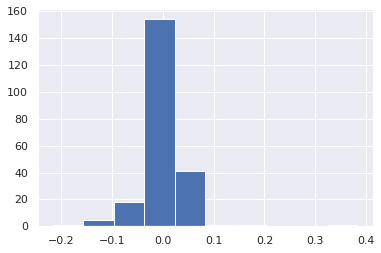

In [74]:
import seaborn as sns #biblioteka do fajncyh stylów obrazkó
sns.set() # włączanie biblioteki

df.day_to_day_change.hist(bins=10) # tworzenie histogramu 

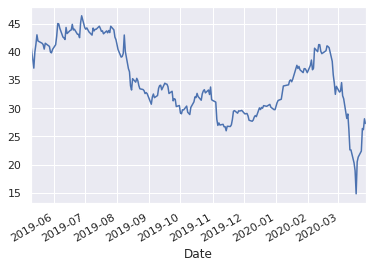

In [76]:
df.close.plot()